In [1]:
from HistoryMatching.ReadFiles import ReadObsFile
from HistoryMatching.Utils import GerenateObsFile,Contitional_ES_MDA,Plot_Result
from HistoryMatching.ModelDL import *
from Model.Utils import MPS_Generator
import numpy as np

Using TensorFlow backend.


# Load Ensemble Data

In [2]:
generator = MPS_Generator('DataSet/MPS45/test_val.tfrecords',200)
Facies = generator.get_numpy_batch()
Facies = np.argmax(Facies,axis=-1).reshape((200,45*45)).T

# Generate Measurement

In [3]:
GenerateMeasurement=True
import scipy.io as sio
True45 = sio.loadmat('DataSet/True45.mat')
True45 = True45['True']
if GenerateMeasurement:
    ""
    ""
    xp = [2,37,7,33]      # produtor well
    yp = [22,4,42,41]     # produtor well
    xi = [7,24,42]        # injetor well
    yi = [4,14,26]        # injetor well
    position=np.array([yp+yi] + [xp+xi]).T
    obs=GerenateObsFile(position,True45)
    print(obs)

[1, 0, 1, 1, 1, 0, 1]


# Test #1
<ul>
    <li> File utilizado: 'Obs.dat' </li>
        <ul>
            <li> xp = [2,37,7,33] - Poço produtor </li>
            <li> yp = [22,4,42,41] - Poço produtor </li>
            <li> xi = [7,24,42] - Poço injetor </li>
            <li> yi = [4,14,26] - Poço injetor </li>
        </ul>
    </li>
    <li> position = np.array([yp+yi] + [xp+xi]).T </li>
</ul>
    

## Read Observation File

In [4]:
obs,R,t_acu,act,produccion = ReadObsFile('Obs.dat')

In [5]:
model = {'redePath':'Model/TrainModel/CVAE45',
        'PCA' : False,
        'IsGans' : False,
        'Model_Dim' : (45,45,1),
        'toCategorical' : True,
        'isTanh' : False,
        'NumFacies' :2}
network = ModelDL(model)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Generate parameterized Facies data

In [6]:
m_x  = network.predict(Facies, is_update=False)

## Reconstucted Initial Facies data

In [7]:
m_f = network.predict(m_x)

## Execute ES-MDA for generate Contidional Sampling

In [8]:
m_f_a=Contitional_ES_MDA(10,[],position,obs,R,m_x,m_f,[45,45],redeVAE=network)

Erro ite_ 0  :  800.0
Erro ite_ 1  :  394.0
Erro ite_ 2  :  165.0
Erro ite_ 3  :  78.0
Erro ite_ 4  :  42.0
Erro ite_ 5  :  34.0
Erro ite_ 6  :  17.0
Erro ite_ 7  :  9.0
Erro ite_ 8  :  6.0
Erro ite_ 9  :  3.0
Erro End:  3.0


## Plot True Model and Result

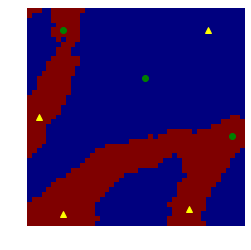

In [9]:
import matplotlib.pyplot as plt
#%matplotlib notebook
plt.imshow(True45.reshape((45,45)),cmap='jet')
plt.plot(xp,yp,'^',color='yellow')
plt.plot(xi,yi,'o',color='green')
plt.axis('off')
plt.show()

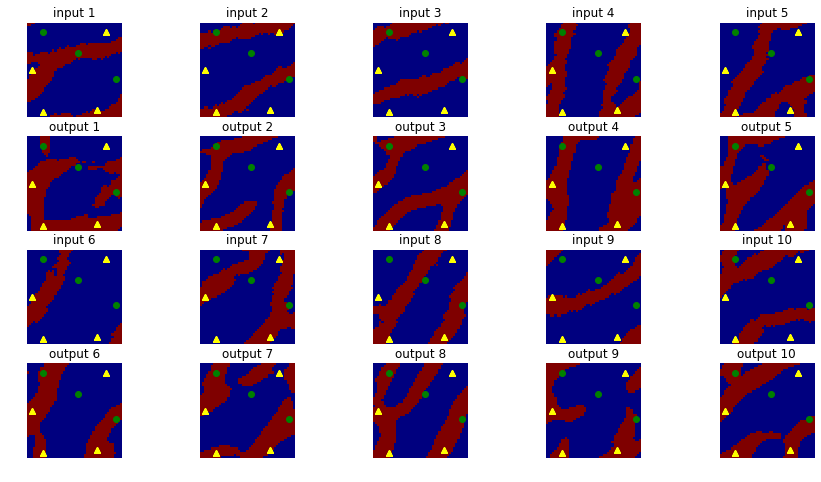

In [10]:
Plot_Result(Facies,m_f_a,xp,yp,xi,yi,initial_data=0) 

# Teste 2

<ul>
    <li> Arquivo utilizado: 'Obs2.dat' </li>
    <li> Pontos utilizados:
        <ul>
            <li> xe = [2,8,18,33,41,44,2,10,26,38,44] </li>
            <li> ye = [40,34,27,23,19,7,15,10,1,40,36] </li>
            <li> xi = [] </li>
            <li> yi = [] </li>
        </ul>
    </li>
    <li> position = np.array([ye] + [xe]).T </li>
</ul>

In [11]:
GenerateMeasurement=True
import scipy.io as sio
True45 = sio.loadmat('DataSet/True45.mat')
True45 = True45['True']
if GenerateMeasurement:
    ""
    ""
    xe=[2,12,22,32,42,2,12,22,32,42,2,12,22,32,42,2,12,22,32,42]
    ye=[3, 3 ,3,3,3,16,16,16,16,16,28,28,28,28,28,42,42,42,42,42]
    #xe = [2, 8, 18,33,41,44,2 ,10,26,38,44]
    #ye = [40,34,30,28,25,7 ,15,10,1 ,40,36]
    position=np.array([ye] + [xe]).T
    obs=GerenateObsFile(position,True45,filePath='Obs2.dat')
    print(obs)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]


## Read Observation File

In [12]:
obs,R,t_acu,act,produccion = ReadObsFile('Obs2.dat')

## Generate parameterized Facies data

In [13]:
m_x  = network.predict(Facies, is_update=False)

## Reconstucted Initial Facies data


In [14]:
m_f = network.predict(m_x)

## Execute ES-MDA for generate Contidional Sampling

In [15]:
m_f_a=Contitional_ES_MDA(10,[],position,obs,R,m_x,m_f,[45,45],redeVAE=network)

Erro ite_ 0  :  1797.0
Erro ite_ 1  :  1061.0
Erro ite_ 2  :  561.0
Erro ite_ 3  :  347.0
Erro ite_ 4  :  195.0
Erro ite_ 5  :  110.0
Erro ite_ 6  :  82.0
Erro ite_ 7  :  60.0
Erro ite_ 8  :  48.0
Erro ite_ 9  :  41.0
Erro End:  40.0


## Plot True Model and Result

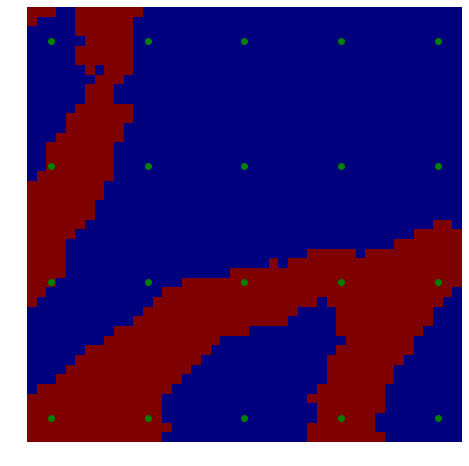

In [16]:
import matplotlib.pyplot as plt
#%matplotlib notebook
plt.imshow(True45.reshape((45,45)),cmap='jet')
plt.plot(xe,ye,'o',color='green')
plt.axis('off')
plt.show()

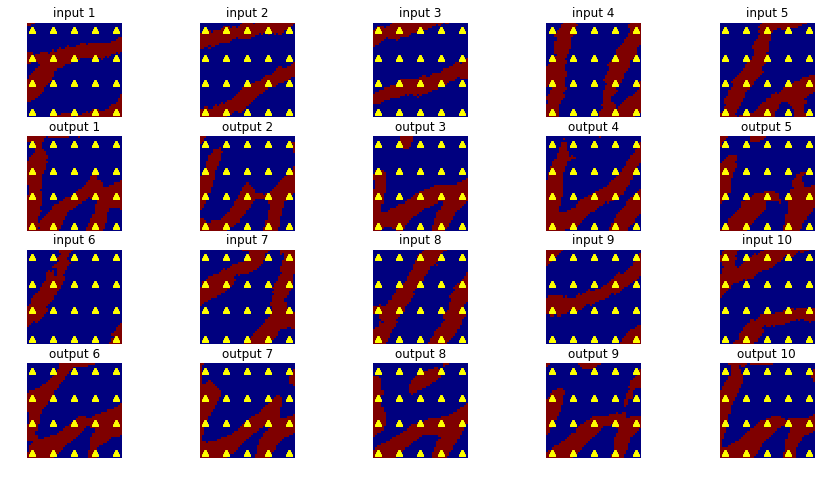

In [17]:
Plot_Result(Facies,m_f_a,xe,ye,[],[],initial_data=0) 

# Generate Random Samples

In [18]:
import numpy as np
z_0=np.random.normal(0,1,size=(100,500))

In [19]:
x_0 = network.predict(z_0.T)
z_i  = z_0
Z    = [x_0]
for i in range(100):  
    dz   = np.random.normal(0,0.01,size=(100,500)) 
    z_i  = z_i + dz   
    x_i  = network.predict(z_i.T)
    Z.append(x_i)

In [20]:
def Plot_Random(facies,m_f_a,initial_data=0,marked='r^',shape=[45,45],sampling=[0,20]):
    plt.rcParams['figure.figsize'] = (15,8)
    fig, axs = plt.subplots(2,5)
    #plt.title(title)
    for i in range(5):
        axs[0,i].imshow(facies[:,i+initial_data].reshape(shape[0],shape[1]), cmap='jet')
        axs[0,i].axis('off')
        axs[0,i].set_title('Sampling: x_%i (%i)'%(sampling[0],i+1))
        axs[1,i].imshow(m_f_a[:,i+initial_data].reshape(shape[0],shape[1]), cmap='jet')        
        axs[1,i].axis('off')
        axs[1,i].set_title('Sampling: x_%i (%i)'%(sampling[1],i+1)) 
    plt.show()

In [21]:
def plot_imagens(Z,index,num=5,shape=[45,45]):
    plt.rcParams['figure.figsize'] = (15,8)
    aux = Z[index]    
    for i in range(num):
        plt.imshow(aux[:,i].reshape(shape[0],shape[1]),cmap='jet')
        plt.axis('off')
        plt.show()

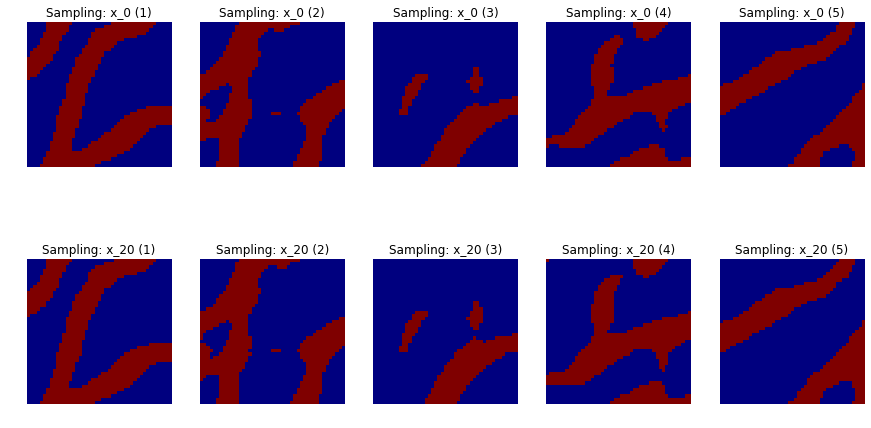

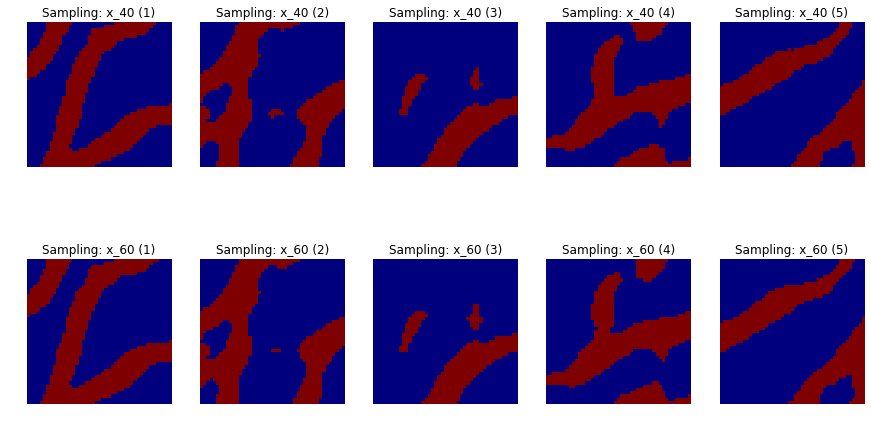

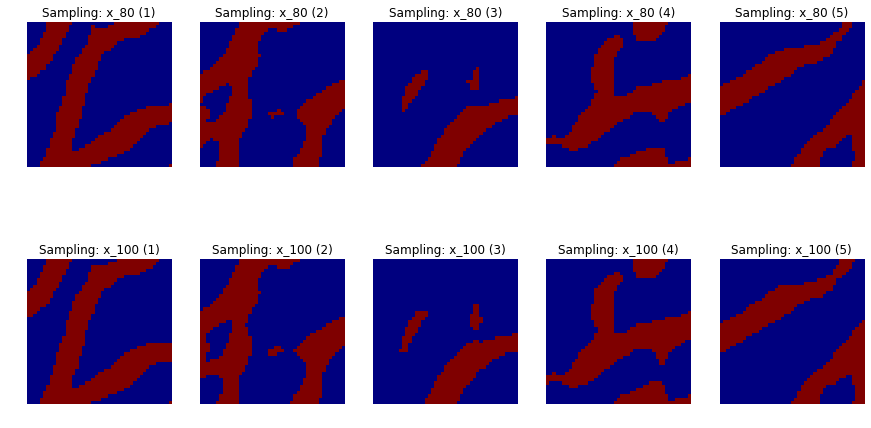

In [22]:
Plot_Random(Z[0],Z[20],initial_data=0,sampling=[0,20])
Plot_Random(Z[40],Z[60],initial_data=0,sampling=[40,60])
Plot_Random(Z[80],Z[100],initial_data=0,sampling=[80,100]) 